# Student Intervention System

For Downloading DataSet (https://github.com/shubh2002/DataSets)

Our goal for this project is to identify students who might need early intervention before they fail to graduate.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Student Intervention System.csv')

In [3]:
df.shape

(395, 31)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
        'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
       dtype='object'),
 dtype('O'): Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic', 'passed'],
       dtype='object')}

In [6]:
obj_dtype_columns=df.columns[df.dtypes=='object']
len(obj_dtype_columns)

18

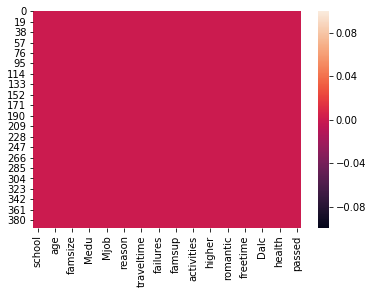

In [7]:
sns.heatmap(df.isnull())

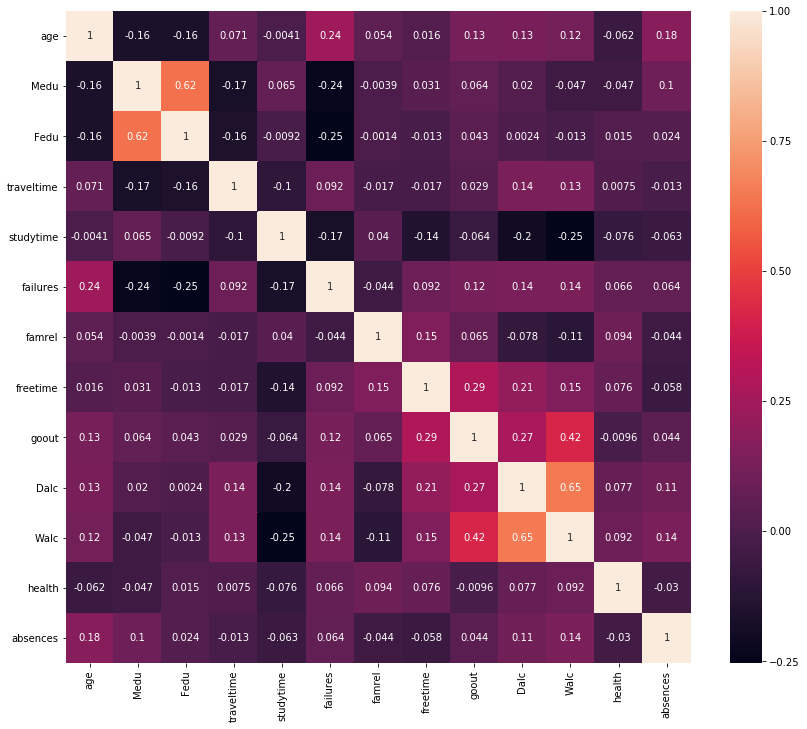

In [8]:
corr_heatmap=df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_heatmap,annot=True)

In [9]:
for i in obj_dtype_columns:
    print(df[i].value_counts())
    print('\n')
    

GP    349
MS     46
Name: school, dtype: int64


F    208
M    187
Name: sex, dtype: int64


U    307
R     88
Name: address, dtype: int64


GT3    281
LE3    114
Name: famsize, dtype: int64


T    354
A     41
Name: Pstatus, dtype: int64


other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


mother    273
father     90
other      32
Name: guardian, dtype: int64


no     344
yes     51
Name: schoolsup, dtype: int64


yes    242
no     153
Name: famsup, dtype: int64


no     214
yes    181
Name: paid, dtype: int64


yes    201
no     194
Name: activities, dtype: int64


yes    314
no      81
Name: nursery, dtype: int64


yes    375
no      20
Name: higher, dtype: int64


yes    329
no      66
Name: internet, dtype: int64


no    

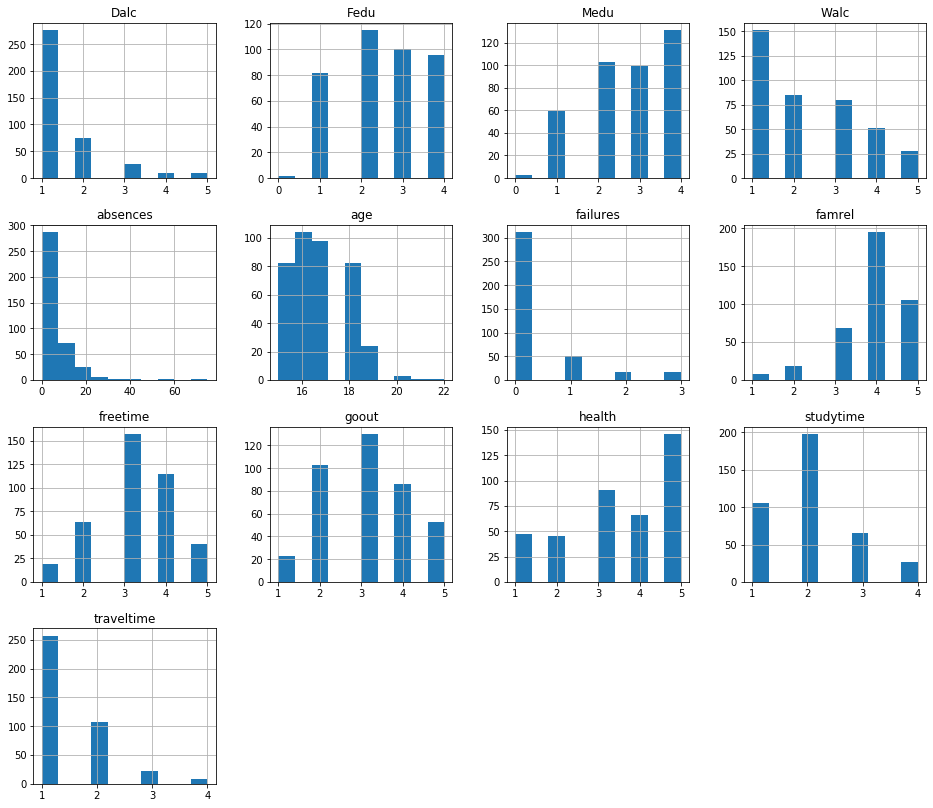

In [10]:
df.hist(figsize=(16,14))
plt.show()

In [11]:
df=pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,1,0,1,1,0,0,1


In [13]:
x=df.iloc[:,:-1]
x.shape

(395, 39)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
scaling=MinMaxScaler()
x_scaled=scaling.fit_transform(x)
x_scaled=pca.fit_transform(x)

In [15]:
y=df.iloc[:,-1]
y.shape

(395,)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=42)

0.7468354430379747


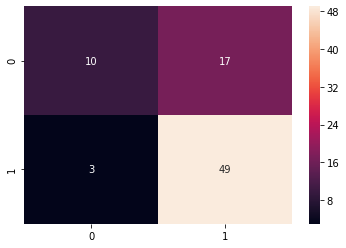

In [17]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
print(acc1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()


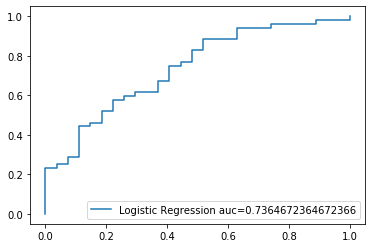

In [19]:
y_pred_prob=model1.predict_proba(x_test)[::,1]
auc1=roc_auc_score(y_test,y_pred_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='Logistic Regression auc='+str(auc1))
plt.legend(loc=4)
plt.show()

0.6962025316455697
AxesSubplot(0.125,0.125;0.62x0.755)


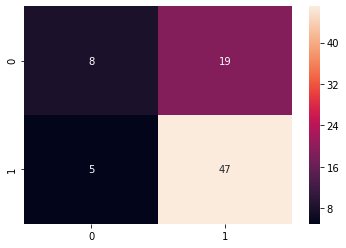

In [20]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
print(acc2)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

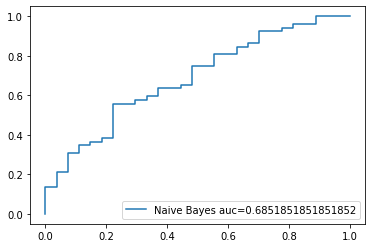

In [21]:
y_pred_prob=model2.predict_proba(x_test)[::,1]
auc2=roc_auc_score(y_test,y_pred_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='Naive Bayes auc='+str(auc2))
plt.legend(loc=4)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='gini')
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
print(acc3)

0.620253164556962


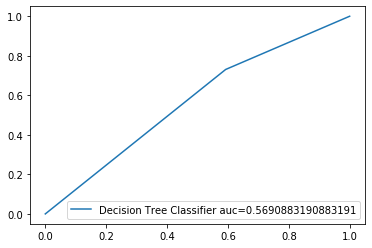

In [25]:
y_pred_proba=model3.predict_proba(x_test)[::,1]
auc3=roc_auc_score(y_test,y_pred_proba)
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='Decision Tree Classifier auc='+str(auc3))
plt.legend(loc=4)
plt.show()

0.6708860759493671
AxesSubplot(0.125,0.125;0.62x0.755)


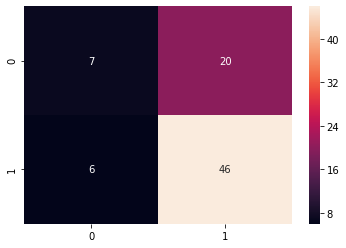

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=10)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
print(acc4)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

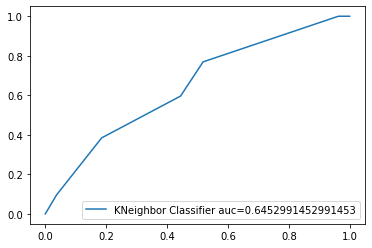

In [28]:
y_pred_proba=model4.predict_proba(x_test)[::,1]
auc4=roc_auc_score(y_test,y_pred_proba)
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='KNeighbor Classifier auc='+str(auc4))
plt.legend(loc=4)
plt.show()


0.6962025316455697
AxesSubplot(0.125,0.125;0.62x0.755)


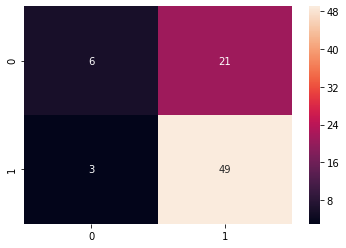

In [29]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=300,criterion='gini')
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
print(acc5)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
plt.show()

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model6=AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred)
print(acc6)

0.569620253164557


In [31]:
from sklearn.model_selection import cross_val_score
models=[model1,model2,model3,model4,model5,model6]
CV=[]
for i in models:
    score=cross_val_score(i,x_scaled,y,scoring='accuracy',cv=10)
    score=score.mean()
    print(score)
    CV.append(score)

0.7060897435897435
0.6855769230769231
0.63
0.6783333333333333
0.7086538461538462
0.6277564102564103


# Hyperparameter Tunning

In [32]:
from sklearn.model_selection import GridSearchCV
"""For Random Forest"""
parameters=({'n_estimators':[50,100,150,200,250],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6],'max_features':
            ['auto','sqrt','log2'],'n_jobs':[1,-1],'random_state':[0,10,15,30,35,40,42,45,50,53]})
GSrfc=GridSearchCV(estimator=model5,param_grid=parameters,cv=10,scoring='accuracy',n_jobs=-1)
GSrfc.fit(x_train,y_train)
print(GSrfc.best_score_)
print(GSrfc.best_params_)


0.7341772151898734
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100, 'n_jobs': 1, 'random_state': 40}
